In [1]:
# NOTE: three main ideas that will be spoken here is
# 1) categorical correlation
# 2) pariplot
# 3) swarmplots and graph annotation

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../dataset/fifa.csv', index_col=0)

df.head()

/home/rafi/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

# Correlation

## Numerical

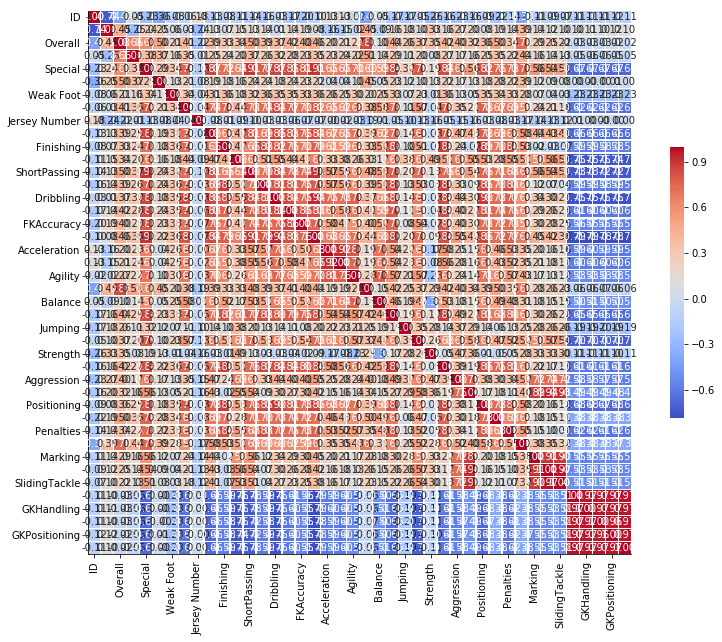

In [5]:
# NOTE: we use pearson's correlation here

graph = sns.heatmap(
    df.corr(),
#     vmax=.3,
#     center=0,
    square=True,
    linewidths=.5,
    cbar_kws={'shrink': .5},
    annot=True,
    fmt='.2f',
    cmap='coolwarm')

# Remove the top and right spines from plot(s).
sns.despine()

graph.figure.set_size_inches(14, 10)

plt.show()

## Categorical

In [4]:
# https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test
# https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
# https://en.wikipedia.org/wiki/Correlation_ratio
# https://en.wikipedia.org/wiki/P-value
# https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/
# http://www.stat.yale.edu/Courses/1997-98/101/chisq.htm

In [5]:
# checking shape of Nationality and Club

print('Nationality: {}'.format(df['Nationality'].unique().size))
print('Club: {}'.format(df['Club'].unique().size))

Nationality: 164
Club: 652


In [6]:
# NOTE: creating nc, data frame for Nationality and Club
# NOTE: Counter is a dummy column used for aggregator, '1' means a person

nc = df[['Nationality', 'Club']]
nc['Counter'] = 1
nc.head()

/home/rafi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Nationality,Club,Counter
0,Argentina,FC Barcelona,1
1,Portugal,Juventus,1
2,Brazil,Paris Saint-Germain,1
3,Spain,Manchester United,1
4,Belgium,Manchester City,1


In [10]:
# transforming by pivot

nc_pivot = pd.pivot_table(
    nc,
    values='Counter',
    index=['Nationality'],
    columns=['Club'],
    aggfunc=np.sum)
nc_pivot = nc_pvt.fillna(0)
nc_pivot.head()

Club,SSV Jahn Regensburg,1. FC Heidenheim 1846,1. FC Kaiserslautern,1. FC Köln,1. FC Magdeburg,1. FC Nürnberg,1. FC Union Berlin,1. FSV Mainz 05,AC Ajaccio,AC Horsens,...,Wycombe Wanderers,Yeni Malatyaspor,Yeovil Town,Yokohama F. Marinos,Zagłębie Lubin,Zagłębie Sosnowiec,Çaykur Rizespor,Örebro SK,Östersunds FK,Śląsk Wrocław
Nationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
# TODO: do a cramer analysis towards the nc_pvt

# NOTE: col and idx will be used for indexing
col = np.asarray(nc_pvt.columns)
idx = np.asarray(nc_pvt.index)

print(nc_pvt.shape)
print('Idx:', idx.size)
print('Col:', col.size)

(163, 651)
Idx: 163
Col: 651


In [64]:
# NOTE: there should be a space for refractoring here, but just think of it later

col_total = np.array([])
idx_total = np.array([])

for i in range(0, col.size):
    col_total = np.append(col_total, nc_pvt[col[i]].sum())

for j in range(0, idx.size):
    idx_total = np.append(idx_total, nc_pvt.loc[idx[j]].sum())

print(col_total.dtype)
print(col_total.shape)

print(idx_total.dtype)
print(idx_total.shape)

float64
(651,)
float64
(163,)


In [97]:
from tqdm import tqdm_notebook

In [99]:
# SUPER F BIG NOTE: later create a numpy array consisting this idx and col total, 
# so the summation could be in linear alg term

In [110]:
obs = nc_pvt.values
obs_total = nc_array.size
# NOTE: this r and k are following wikipedia's notation, just to make u scared hehe
r, k = nc_array.shape
# NOTE: chi is for chi-squared
chi = 0

for i in tqdm_notebook(range(0, r)):
    for j in range(0, k):
        expected = idx_total[i] * col_total[j] / obs_total
        chi += np.square(obs[i][j] - expected) / expected

print(chi)


2469376.171152859


In [121]:
cramer = np.sqrt(chi / (obs_total * np.minimum(k - 1, r - 1)))

print(cramer)

0.37901100707221386
